# Genetik Algoritma ile Kargo Kutusu Tasarımı

**Konu:** Kısıtlı Optimizasyon Problemi (Kargo Kutusu Tasarımı)
**Öğrenci Adı:** Zeynep Sütçü
**Numara:** 2312721006

[GitHub](https://github.com/zeynepsutcu/genetik_optimizasyonu)

---

## 1. Problemin Tanımı ve Senaryo
Bir e-ticaret firması, ürün gönderimleri için hem hacmi maksimize eden hem de malzeme maliyetini minimize eden optimum kutu ölçülerini belirlemek istemektedir. Amaç, **Genişlik ($x_1$)** ve **Yükseklik ($x_2$)** değerlerini optimize etmektir.

### Matematiksel Model
* **Amaç Fonksiyonu (Fayda Puanı):**
    $$f(x) = x_1 \cdot x_2 - 0.1x_1^2 - 0.1x_2^2$$
    *(Hacim - Malzeme Maliyeti)*

* **Değişken Sınırları:**
    * $x_1$ (Genişlik): $[10, 40]$ cm
    * $x_2$ (Yükseklik): $[5, 20]$ cm

* **Kısıtlar:**
    * $x_1 \cdot x_2 \le 600$ (Raf sığdırma sınırı / Alan kısıtı)
    * $x_1 \ge 15$ (Minimum genişlik kısıtı)

---

In [31]:
import random
import numpy as np
import matplotlib.pyplot as plt

# --- PARAMETRELER VE SABİTLER ---
POPULATION_SIZE = 50       # Popülasyon büyüklüğü
GENERATIONS = 100          # Kaç nesil dönecek
MUTATION_RATE = 0.1        # Mutasyon ihtimali (%10)
TOURNAMENT_SIZE = 3        # Turnuva seçimi katılımcı sayısı

# Değişken Sınırları (Senaryo 6)
BOUNDS_X1 = (10, 40)  # Genişlik (cm)
BOUNDS_X2 = (5, 20)   # Yükseklik (cm)

## 2. Uygunluk (Fitness) ve Kısıt Fonksiyonları
Amaç fonksiyonu `hacim - maliyet` dengesini kurar. Kısıtlar ise fiziksel sınırları belirler.
Eğer bir kutu $600 cm^2$ alanını geçerse veya genişliği $15 cm$'den az olursa, **Ceza (Penalty)** puanı uygulanır.

In [32]:
def objective_function(x1, x2):
    # Senaryo 6: y = x1*x2 - 0.1*x1^2 - 0.1*x2^2
    return (x1 * x2) - (0.1 * (x1**2)) - (0.1 * (x2**2))

def calculate_fitness(individual):
    x1 = individual[0]
    x2 = individual[1]

    score = objective_function(x1, x2)

    # --- CEZA (PENALTY) MEKANİZMASI ---
    penalty = 0

    # Kısıt 1: x1 * x2 <= 600 (Raf Sınırı)
    area = x1 * x2
    if area > 600:
        penalty += (area - 600) * 10  # Sınırı ne kadar aştıysa ceza kes

    # Kısıt 2: x1 >= 15 (Minimum Genişlik)
    # Sınır [10, 40] olduğu için algoritma 10-15 arası değer üretebilir.
    # Bunları cezalandırarak eliyoruz.
    if x1 < 15:
        penalty += (15 - x1) * 100 + 500 # Ciddi bir ceza

    return score - penalty

def create_individual():
    return [random.uniform(*BOUNDS_X1), random.uniform(*BOUNDS_X2)]

def create_population():
    return [create_individual() for _ in range(POPULATION_SIZE)]

## 3. Genetik Operatörler
* **Turnuva Seçimi:** Rastgele seçilen adaylar arasından en iyisi ebeveyn olur.
* **Aritmetik Çaprazlama:** Ebeveyn genlerinin ağırlıklı ortalaması alınır.
* **Mutasyon:** Genlere küçük rastgele değişimler uygulanır.

In [33]:
def tournament_selection(population):
    selected = random.sample(population, TOURNAMENT_SIZE)
    return max(selected, key=calculate_fitness)

def crossover(parent1, parent2):
    alpha = random.random()
    child1 = [alpha * parent1[0] + (1 - alpha) * parent2[0],
              alpha * parent1[1] + (1 - alpha) * parent2[1]]
    child2 = [alpha * parent2[0] + (1 - alpha) * parent1[0],
              alpha * parent2[1] + (1 - alpha) * parent1[1]]
    return child1, child2

def mutate(individual):
    if random.random() < MUTATION_RATE:
        # x1 Mutasyonu
        individual[0] += random.uniform(-1.0, 1.0) # Genişlik değişimi
        individual[0] = np.clip(individual[0], *BOUNDS_X1)

        # x2 Mutasyonu
        individual[1] += random.uniform(-1.0, 1.0) # Yükseklik değişimi
        individual[1] = np.clip(individual[1], *BOUNDS_X2)
    return individual

## 4. Algoritmanın Çalıştırılması (Main Loop)
100 Nesil boyunca popülasyon evrimleştirilir. **Elitizm** sayesinde her neslin en iyi çözümleri korunur.

In [34]:
# Başlangıç
population = create_population()
best_fitness_history = []

print(f"Genetik Algoritma Başlatılıyor... Hedef: Kargo Kutusu Optimizasyonu")

for generation in range(GENERATIONS):
    # Sıralama
    population = sorted(population, key=calculate_fitness, reverse=True)

    # En iyiyi kaydet
    best_ind = population[0]
    best_fitness_history.append(calculate_fitness(best_ind))

    # Yeni popülasyon (Elitizm: En iyi 2 bireyi sakla)
    new_population = []
    new_population.extend(population[:2])

    while len(new_population) < POPULATION_SIZE:
        p1 = tournament_selection(population)
        p2 = tournament_selection(population)
        c1, c2 = crossover(p1, p2)
        new_population.extend([mutate(c1), mutate(c2)])

    population = new_population[:POPULATION_SIZE]

Genetik Algoritma Başlatılıyor... Hedef: Kargo Kutusu Optimizasyonu


## 5. Sonuçlar ve Analiz
Elde edilen en iyi kutu ölçüleri ve optimizasyon grafiği aşağıdadır.


--- OPTİMİZASYON SONUCU ---
En İyi Genişlik (x1) : 29.9988 cm
En İyi Yükseklik (x2): 20.0000 cm
Hesaplanan Alan      : 599.9752 cm^2 (Sınır: 600)
Maksimum Puan (y)    : 469.9827


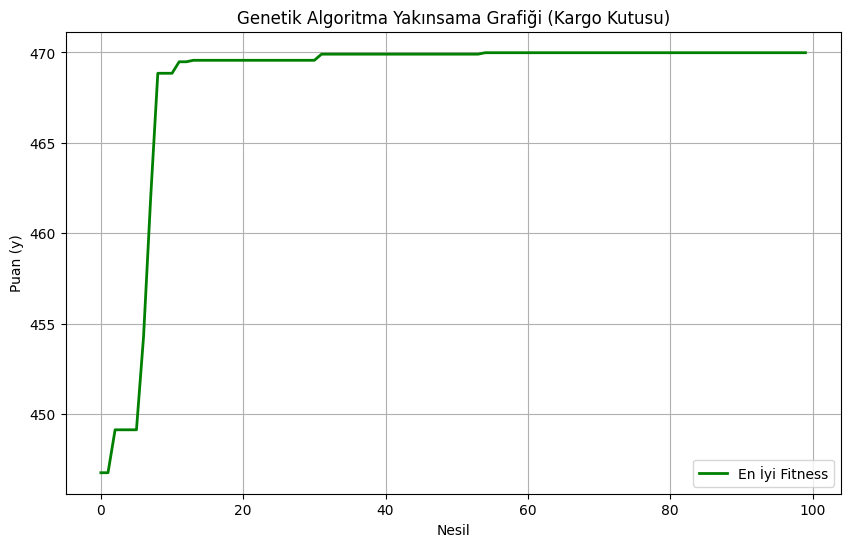

In [35]:
best_solution = max(population, key=calculate_fitness)
best_x1, best_x2 = best_solution
final_score = objective_function(best_x1, best_x2)
area_check = best_x1 * best_x2

print("\n--- OPTİMİZASYON SONUCU ---")
print(f"En İyi Genişlik (x1) : {best_x1:.4f} cm")
print(f"En İyi Yükseklik (x2): {best_x2:.4f} cm")
print(f"Hesaplanan Alan      : {area_check:.4f} cm^2 (Sınır: 600)")
print(f"Maksimum Puan (y)    : {final_score:.4f}")

# Grafik
plt.figure(figsize=(10, 6))
plt.plot(best_fitness_history, label='En İyi Fitness', color='green', linewidth=2)
plt.title('Genetik Algoritma Yakınsama Grafiği (Kargo Kutusu)')
plt.xlabel('Nesil')
plt.ylabel('Puan (y)')
plt.grid(True)
plt.legend()
plt.show()